# Data Cleaning

This notebook takes data from **the Marshalls Project** and proceeds to briefly analize them with the sole purpose of cleaning them. In the next notebook, **02_Feature_Data** we then proceed adding the Prison Features collected from the Bureau of Justice and Civilian Covid cases dataset curated by J. Hopkins University.

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Data-Type" data-toc-modified-id="Data-Type-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Data Type</a></span><ul class="toc-item"><li><span><a href="#Date" data-toc-modified-id="Date-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Date</a></span></li><li><span><a href="#Tests" data-toc-modified-id="Tests-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Tests</a></span></li><li><span><a href="#Regions" data-toc-modified-id="Regions-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Regions</a></span></li></ul></li><li><span><a href="#State-Analysis" data-toc-modified-id="State-Analysis-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>State Analysis</a></span><ul class="toc-item"><li><span><a href="#Fill-Nulls" data-toc-modified-id="Fill-Nulls-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Fill Nulls</a></span></li><li><span><a href="#Isolate-once-a-month-data" data-toc-modified-id="Isolate-once-a-month-data-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Isolate once a month data</a></span></li><li><span><a href="#Comulative-Columns-to-Increase-value" data-toc-modified-id="Comulative-Columns-to-Increase-value-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Comulative Columns to Increase value</a></span></li></ul></li><li><span><a href="#Export-Cleaned-Data" data-toc-modified-id="Export-Cleaned-Data-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Export Cleaned Data</a></span></li></ul></div>

In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import missingno as msno
import seaborn as sns

In [54]:
df = pd.read_csv ('./data/covid_prison_cases.csv')

In [55]:
df.head()

,name,abbreviation,staff_tests,staff_tests_with_multiples,total_staff_cases,staff_recovered,total_staff_deaths,prisoner_tests,prisoner_tests_with_multiples,total_prisoner_cases,prisoners_recovered,total_prisoner_deaths,as_of_date,notes
0,Alabama,AL,NaN,NaN,951.0,800.0,3.0,NaN,14694.0,1369.0,1198.0,60.0,1/25/21,NaN
1,Alaska,AK,NaN,NaN,268.0,NaN,0.0,NaN,19858.0,2294.0,NaN,5.0,1/25/21,Alaska is not tracking vaccination numbers for...
2,Arizona,AZ,NaN,NaN,2429.0,1911.0,NaN,43447.0,NaN,9547.0,7563.0,47.0,1/26/21,NaN
3,Arkansas,AR,NaN,NaN,NaN,NaN,4.0,NaN,NaN,10905.0,10791.0,52.0,1/26/21,NaN
4,California,CA,NaN,NaN,15012.0,13676.0,22.0,116347.0,NaN,46595.0,43309.0,187.0,1/26/21,NaN


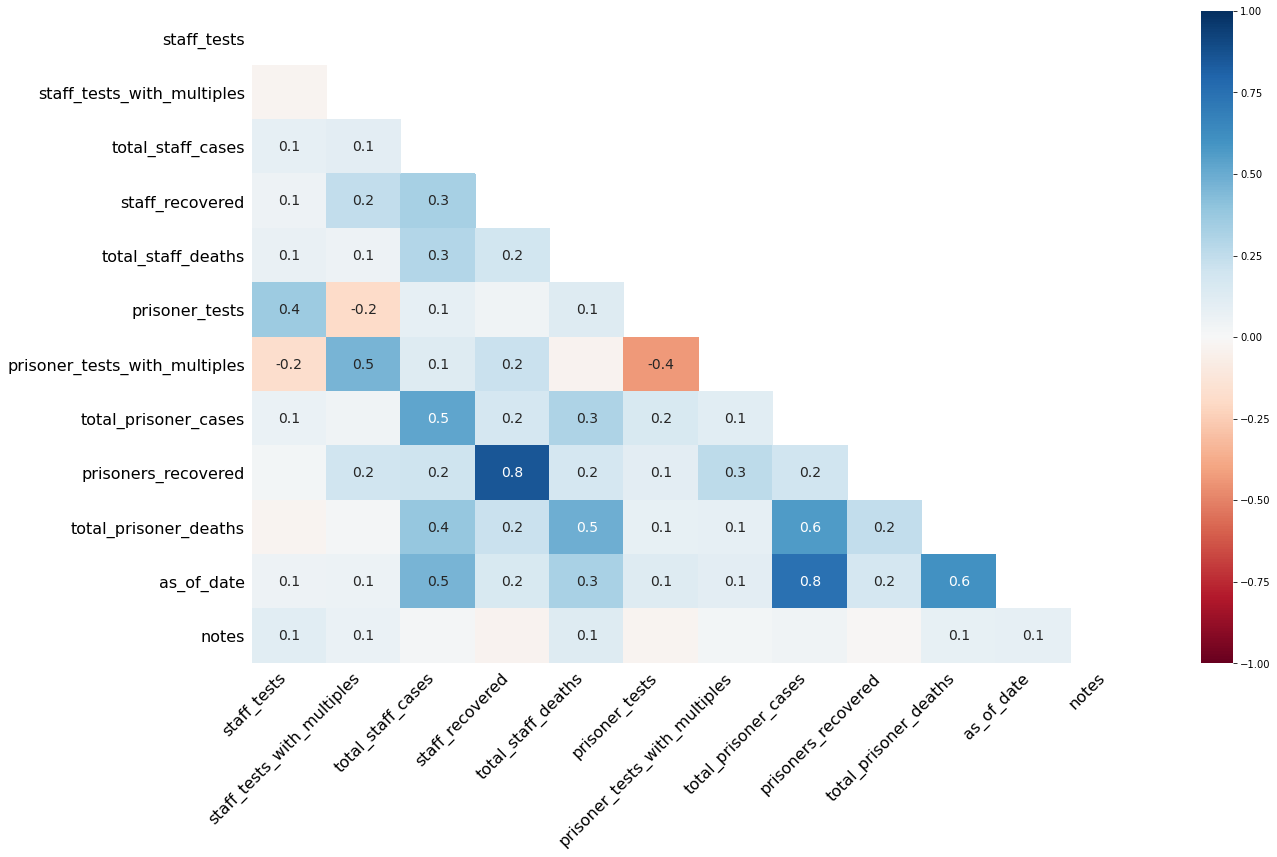

In [56]:
msno.heatmap(df);

We notice that:
1. Recovered Informations are missing in 80% of cases for both Prisoners and Staff in the same records.
2. When missing `as_of_date` is in 80% of cases missing the total `prisoners cases`

## Data Type

We start our analysis by observing the data types and assigning the appropriate ones. 

In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2295 entries, 0 to 2294
Data columns (total 14 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   name                           2295 non-null   object 
 1   abbreviation                   2295 non-null   object 
 2   staff_tests                    332 non-null    float64
 3   staff_tests_with_multiples     374 non-null    float64
 4   total_staff_cases              2131 non-null   float64
 5   staff_recovered                1381 non-null   float64
 6   total_staff_deaths             1978 non-null   float64
 7   prisoner_tests                 1114 non-null   float64
 8   prisoner_tests_with_multiples  890 non-null    float64
 9   total_prisoner_cases           2228 non-null   float64
 10  prisoners_recovered            1476 non-null   float64
 11  total_prisoner_deaths          2194 non-null   float64
 12  as_of_date                     2257 non-null   o

Notes: 
- `name` and `abbreviation` are duplicates
- `notes` are to be dropped after exploratory phase
- `as_of_date` is a timestamp of data collection. We will turn this into date_time type and extract all months for 2020.

### Date

Data in our dataframe are collected weekley, but we decide to proceed with a monthly analysis to uniform better with differences in the reporting in States (many report monthly, so a lot of values are duplicated).

To do that, we decide to create two additional columns, storing respectively `year` and `month` of the recorded data.

In [58]:
df['as_of_date'] = pd.to_datetime(df['as_of_date'])

In [59]:
df['year'] = df['as_of_date'].dt.year

In [60]:
df['month'] = df['as_of_date'].dt.month

In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2295 entries, 0 to 2294
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   name                           2295 non-null   object        
 1   abbreviation                   2295 non-null   object        
 2   staff_tests                    332 non-null    float64       
 3   staff_tests_with_multiples     374 non-null    float64       
 4   total_staff_cases              2131 non-null   float64       
 5   staff_recovered                1381 non-null   float64       
 6   total_staff_deaths             1978 non-null   float64       
 7   prisoner_tests                 1114 non-null   float64       
 8   prisoner_tests_with_multiples  890 non-null    float64       
 9   total_prisoner_cases           2228 non-null   float64       
 10  prisoners_recovered            1476 non-null   float64       
 11  total_prisoner_de

### Tests

In the documentation of the dataset the description for the `prisoner_tests_with_multiple`  and `staff_test_with multiple`:
>The cumulative number of tests administered to incarcereted people/staff where unique patients was not available

For this reason we decide to create features that comprhend the available record for both Staff and Inmates, proceeding as follows.

In [62]:
df['prisoner_tests'] = df.loc[:,'prisoner_tests':'prisoner_tests_with_multiples'].fillna(method='ffill',axis=1)['prisoner_tests_with_multiples']
df['staff_tests'] = df.loc[:,'staff_tests':'staff_tests_with_multiples'].fillna(method='ffill',axis=1)['staff_tests_with_multiples']

In [63]:
df.drop(columns=['prisoner_tests_with_multiples','staff_tests_with_multiples'], inplace = True)

### Regions

We decide to create a new feature called `region` to better describe trends on a macro scale.

The dictionary below reflects the categories that the Bureau of Justice Statistics apply to in its analysis.

In [64]:
region = {'South': ['Alabama', 'Florida', 'Georgia', 'Mississippi', 'South Carolina', 'Puerto Rico',
                    'Arkansas', 'Louisiana', 'Oklahoma', 'Texas', 'Delaware', 'Delaware',
                    'District of Columbia', 'Kentucky', 'Maryland', 'North Carolina', 'Tennessee',
                    'Virginia', 'West Virginia'],
          'Northeast': ['Connecticut','Maine','Massachusetts', 'New Hampshire',
                        'New Jersey', 'New York', 'Pennsylvania', 'Rhode Island', 'Vermont'],
          'Midwest': ['Illinois', 'Indiana', 'Iowa', 'Kansas', 'Michigan', 'Minnesota', 'Missouri', 'Nebraska',
                      'North Dakota', 'Ohio', 'South Dakota', 'Wisconsin'],
          'West': ['Alaska','Arizona', 'California','Colorado', 'Hawaii', 'Idaho',
                   'Montana', 'Nevada', 'New Mexico', 'Oregon','Utah','Washington', 'Wyoming'],
          'Federal':['Federal']
}

In [66]:
def return_region(val):
    for key, value in region.items():
        if val in value:
            return key

We then use the small function above to iterate through the dataframe and create the `region` column.

In [67]:
df['region'] = df['name'].apply(return_region)

## State Analysis
We know from the notes in the text that different states have different ways of reporting cases. For this reason we decided to split the states and run a check each of us to the notes and decide how to interpret the data.

In [71]:
n_by_state = df.groupby("name")["month"].count()
n_by_state

name
Alabama           45
Alaska            45
Arizona           45
Arkansas          45
California        45
Colorado          45
Connecticut       44
Delaware          35
Federal           45
Florida           45
Georgia           45
Hawaii            45
Idaho             45
Illinois          45
Indiana           45
Iowa              45
Kansas            43
Kentucky          45
Louisiana         45
Maine             45
Maryland          45
Massachusetts     45
Michigan          45
Minnesota         45
Mississippi       45
Missouri          44
Montana           44
Nebraska          39
Nevada            45
New Hampshire     45
New Jersey        45
New Mexico        45
New York          45
North Carolina    45
North Dakota      45
Ohio              45
Oklahoma          45
Oregon            45
Pennsylvania      45
Rhode Island      43
South Carolina    45
South Dakota      45
Tennessee         44
Texas             45
Utah              45
Vermont           45
Virginia          45
Washingt

It came out that a number of States were reportig cases monthly instead of weekley, and for this reason we decide to reduce our records to a montly analysis.

Also, we notice that all row with empty `as_of_date` value are only containing notes. We decide then to drop them, togethe with the notes.

In [73]:
df.drop(columns=['notes'], inplace = True)

In [74]:
df.dropna(subset= ['as_of_date'], inplace= True)

### Fill Nulls

Empty values in the remaining columns have to be filled with previous available data. This is because they mean for the large part that no new data was available at the time the record has been filled in. *(It is common for example having records reporting prisoners data and other separate ones reporting staff data.)*

To do so we group by State and order records by date and proceed with `ffill` method within `fillna`.

In [75]:
nan_cols = [i for i in df.columns if df[i].isnull().any()]

In [76]:
for col in nan_cols:
    df[col] = df.groupby(['name'], sort=True)[col].apply(lambda x: x.ffill().bfill())

In [77]:
df.isnull().sum()

name                       0
abbreviation               0
staff_tests              759
total_staff_cases          0
staff_recovered           45
total_staff_deaths         0
prisoner_tests            45
total_prisoner_cases       0
prisoners_recovered       45
total_prisoner_deaths      0
as_of_date                 0
year                       0
month                      0
region                     0
dtype: int64

Remaining empty values are either referred to `Federal` level (that will be excluded from our analysis), or, in case of `staff-test`, few States never reported them. We decided later to drop this column *tout-court* as it was not possible to fill the values without altering the analysis. 

In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2256 entries, 0 to 2294
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   name                   2256 non-null   object        
 1   abbreviation           2256 non-null   object        
 2   staff_tests            1497 non-null   float64       
 3   total_staff_cases      2256 non-null   float64       
 4   staff_recovered        2211 non-null   float64       
 5   total_staff_deaths     2256 non-null   float64       
 6   prisoner_tests         2211 non-null   float64       
 7   total_prisoner_cases   2256 non-null   float64       
 8   prisoners_recovered    2211 non-null   float64       
 9   total_prisoner_deaths  2256 non-null   float64       
 10  as_of_date             2256 non-null   datetime64[ns]
 11  year                   2256 non-null   float64       
 12  month                  2256 non-null   float64       
 13  reg

- `staff_test` is still missing in Federal, Alaska, Arizona, California, Colorado, Georgia, Hawaii, Iowa, Maine, Massachusetts, Nebraska, NewYork, Ohio, Oregon, Utha, Washington and Wisconsin;

- `staff_recovered` is missing in Federal;

- `prisoners_test` is missing in Georgia.

Finally, we order the data frame per state and date and reset the index.

In [79]:
df.sort_values(by= ['name', "as_of_date"], ascending=[True, False], inplace= True)

In [80]:
df.reset_index(drop=True)

,name,abbreviation,staff_tests,total_staff_cases,staff_recovered,total_staff_deaths,prisoner_tests,total_prisoner_cases,prisoners_recovered,total_prisoner_deaths,as_of_date,year,month,region
0,Alabama,AL,568.0,951.0,800.0,3.0,14694.0,1369.0,1198.0,60.0,2021-01-25,2021.0,1.0,South
1,Alabama,AL,568.0,907.0,774.0,3.0,14552.0,1294.0,1138.0,57.0,2021-01-18,2021.0,1.0,South
2,Alabama,AL,568.0,863.0,550.0,2.0,14447.0,1262.0,1026.0,54.0,2021-01-12,2021.0,1.0,South
3,Alabama,AL,568.0,863.0,550.0,2.0,14447.0,1262.0,1026.0,54.0,2021-01-05,2021.0,1.0,South
4,Alabama,AL,568.0,804.0,529.0,2.0,12671.0,1161.0,1003.0,54.0,2020-12-28,2020.0,12.0,South
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2251,Wyoming,WY,10.0,1.0,1.0,0.0,14.0,0.0,0.0,0.0,2020-04-22,2020.0,4.0,West
2252,Wyoming,WY,8.0,1.0,1.0,0.0,14.0,0.0,0.0,0.0,2020-04-15,2020.0,4.0,West
2253,Wyoming,WY,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2020-04-08,2020.0,4.0,West
2254,Wyoming,WY,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2020-04-01,2020.0,4.0,West


### Isolate once a month data

As mentioned above, to have effective and meaningful data, we decide to group all our records into 1 per month per state value for all available measures.

To do so we start by reordering the dataset in chronological order, and dropping the rows that have the same name and month, keeping only the last one.

***Note: ths was possible because the data were cumulative, and not incremental.***

In [81]:
df_month = df.sort_values(by="as_of_date").drop_duplicates(subset=["name", 'month'], keep="last")

In [82]:
df_month.head(15)

,name,abbreviation,staff_tests,total_staff_cases,staff_recovered,total_staff_deaths,prisoner_tests,total_prisoner_cases,prisoners_recovered,total_prisoner_deaths,as_of_date,year,month,region
2251,Delaware,DE,301.0,0.0,53.0,0.0,4.0,0.0,132.0,0.0,2020-03-24,2020.0,3.0,South
2256,Illinois,IL,2300.0,3.0,142.0,0.0,13.0,3.0,185.0,0.0,2020-03-25,2020.0,3.0,Midwest
2293,Wyoming,WY,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2020-03-26,2020.0,3.0,West
2269,Montana,MT,24.0,2.0,3.0,0.0,5.0,1.0,3.0,0.0,2020-03-26,2020.0,3.0,West
2280,Oregon,OR,NaN,0.0,9.0,0.0,1.0,0.0,47.0,0.0,2020-03-26,2020.0,3.0,West
2289,Virginia,VA,7525.0,0.0,187.0,0.0,2.0,0.0,613.0,0.0,2020-03-26,2020.0,3.0,South
2285,Tennessee,TN,0.0,0.0,47.0,0.0,0.0,0.0,2593.0,0.0,2020-03-26,2020.0,3.0,South
2255,Idaho,ID,2.0,0.0,5.0,0.0,10.0,0.0,0.0,0.0,2020-03-26,2020.0,3.0,West
2277,North Dakota,ND,89.0,1.0,4.0,0.0,6.0,0.0,0.0,0.0,2020-03-26,2020.0,3.0,Midwest
2268,Missouri,MO,830.0,0.0,12.0,0.0,10.0,1.0,18.0,0.0,2020-03-26,2020.0,3.0,Midwest


Then to verify all went as expected we reorder the dataframe by State and by date.

In [83]:
df_month.sort_values(by= ['name', 'as_of_date'], ascending=[True, False], inplace= True)
df_month.reset_index(drop=True)

,name,abbreviation,staff_tests,total_staff_cases,staff_recovered,total_staff_deaths,prisoner_tests,total_prisoner_cases,prisoners_recovered,total_prisoner_deaths,as_of_date,year,month,region
0,Alabama,AL,568.0,951.0,800.0,3.0,14694.0,1369.0,1198.0,60.0,2021-01-25,2021.0,1.0,South
1,Alabama,AL,568.0,804.0,529.0,2.0,12671.0,1161.0,1003.0,54.0,2020-12-28,2020.0,12.0,South
2,Alabama,AL,568.0,667.0,439.0,2.0,7032.0,855.0,735.0,34.0,2020-11-30,2020.0,11.0,South
3,Alabama,AL,568.0,455.0,388.0,2.0,5339.0,532.0,416.0,27.0,2020-10-26,2020.0,10.0,South
4,Alabama,AL,568.0,398.0,363.0,2.0,2079.0,415.0,377.0,23.0,2020-09-28,2020.0,9.0,South
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
556,Wyoming,WY,380.0,8.0,1.0,0.0,866.0,12.0,0.0,0.0,2020-07-22,2020.0,7.0,West
557,Wyoming,WY,20.0,1.0,1.0,0.0,61.0,0.0,0.0,0.0,2020-06-26,2020.0,6.0,West
558,Wyoming,WY,16.0,1.0,1.0,0.0,30.0,0.0,0.0,0.0,2020-05-29,2020.0,5.0,West
559,Wyoming,WY,10.0,1.0,1.0,0.0,15.0,0.0,0.0,0.0,2020-04-29,2020.0,4.0,West


After having reset the index we are ready for the next step in our data cleaning.

### Comulative Columns to Increase value

Currently our values are cumulative over the months. We want to transform all into incremental features, to be able to predict further on the increase in COVID cases across the States.

To do that we start creating a list of columns that contain cumulative values.

In [84]:
df_month.columns

Index(['name', 'abbreviation', 'staff_tests', 'total_staff_cases',
       'staff_recovered', 'total_staff_deaths', 'prisoner_tests',
       'total_prisoner_cases', 'prisoners_recovered', 'total_prisoner_deaths',
       'as_of_date', 'year', 'month', 'region'],
      dtype='object')

In [85]:
cumulative_columns = ['staff_tests', 'total_staff_cases',
       'staff_recovered', 'total_staff_deaths', 'prisoner_tests',
       'total_prisoner_cases', 'prisoners_recovered', 'total_prisoner_deaths',]

After having identified and stored them in the `cumulative_columns` list, we sot by date and State again, making sure the dates were *ascending*.

In [86]:
df_month.sort_values(by= ['name', "as_of_date"], ascending=[True, True], inplace= True)

Then iterating through the list of columns we groupby State and transform all values into the difference between the value and the previous.

In [87]:
for col in cumulative_columns:
    df_month[col] = df_month.groupby(['name'], sort=True)[col].diff()

In [88]:
df_month.head()

,name,abbreviation,staff_tests,total_staff_cases,staff_recovered,total_staff_deaths,prisoner_tests,total_prisoner_cases,prisoners_recovered,total_prisoner_deaths,as_of_date,year,month,region
2193,Alabama,AL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-03-31,2020.0,3.0,South
1989,Alabama,AL,0.0,11.0,0.0,0.0,61.0,4.0,0.0,1.0,2020-04-28,2020.0,4.0,South
1785,Alabama,AL,0.0,42.0,0.0,0.0,74.0,7.0,0.0,0.0,2020-05-26,2020.0,5.0,South
1530,Alabama,AL,0.0,111.0,74.0,1.0,177.0,57.0,10.0,6.0,2020-06-30,2020.0,6.0,South
1326,Alabama,AL,0.0,125.0,82.0,1.0,407.0,131.0,96.0,8.0,2020-07-28,2020.0,7.0,South


Obviously this cause an entire column to go null, as the first input does not register any increase compared to a previous month. 

In [89]:
df_month['total_staff_cases'].isnull().sum()

51

Having verified this, we drop the null values.

In [90]:
df_month.dropna(subset=['total_staff_cases'], inplace= True)

In [91]:
df_month['total_staff_cases'].isnull().sum()

0

Verified that nulls are now zero for our values we proced with exporting the dataset.

## Export Cleaned Data

Before exporting ur dataset for further analysis, we rename `abbreviation` column with `state`, as it will come in handy in further data frame merging further on.

In [92]:
df_month.rename(columns={'abbreviation':'state'}, inplace=True)

We finally export dataframe.

In [94]:
df_month.to_csv('./data/month_prison_covid_clean.csv', index = False)